In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv(r"C:\Users\mahesh\Documents\OneDrive_2025-03-10\Medical diagnosis using AI\Datasets\diabetes_data.csv")

In [3]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Dataset Description:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469  

In [4]:
# Check for missing values
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())


Missing Values in the Dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


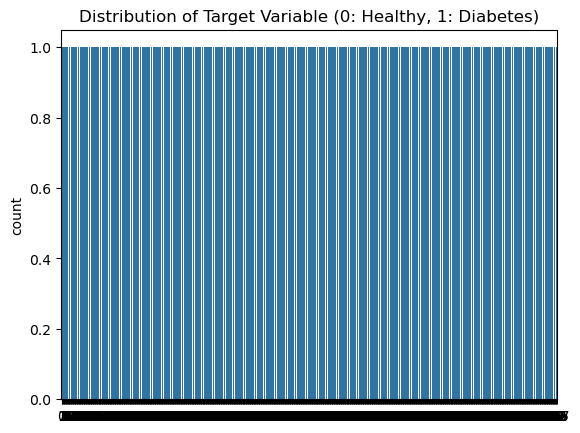

In [7]:
#EDA
sns.countplot(data['Outcome'])  # 'Outcome' is the target variable (0: No Diabetes, 1: Diabetes)
plt.title('Distribution of Target Variable (0: Healthy, 1: Diabetes)')
plt.show()


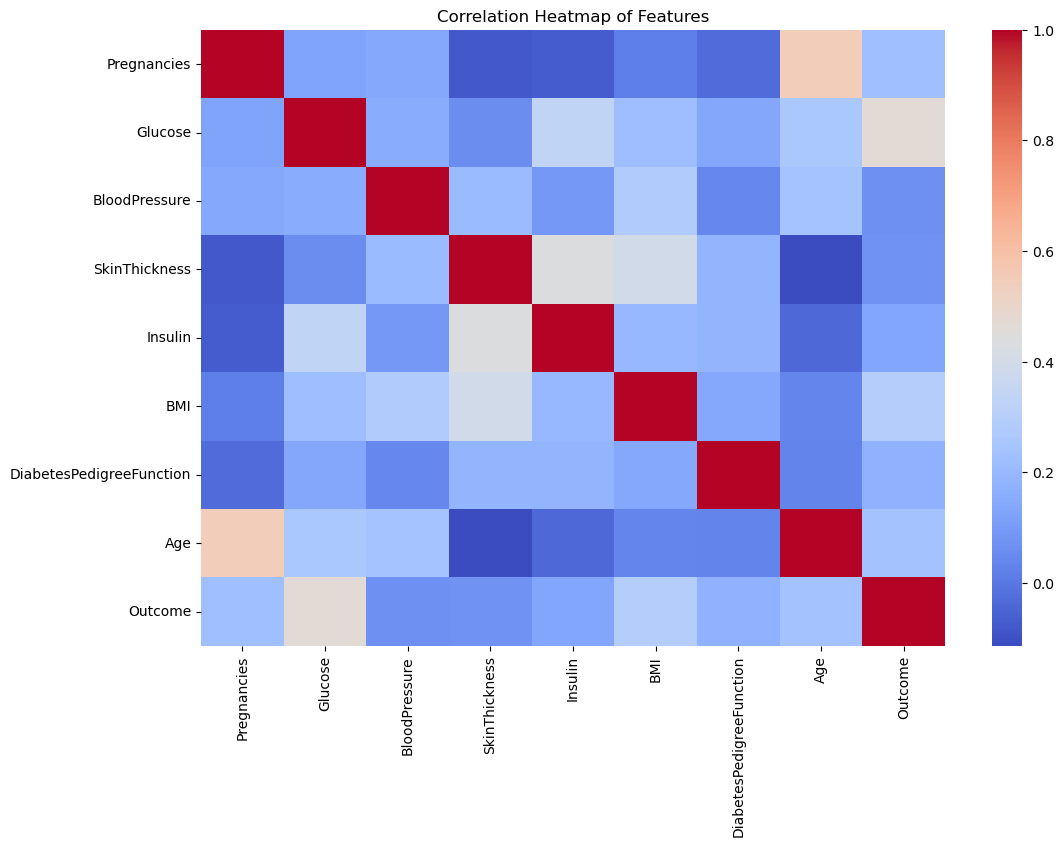

In [10]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

In [11]:
# Prepare data for model training
# 'Outcome' is the target variable, drop it from the feature set
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Recursive Feature Elimination (RFE) for feature selection
rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5, step=1)
X_train_rfe = rfe_selector.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe_selector.transform(X_test_scaled)

In [15]:
# Cross-validation with Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [16]:
# Perform 5-fold cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train_rfe, y_train, cv=5)

In [17]:
# Print cross-validation results
print(f'Cross-validation Accuracy (5-fold): {np.mean(cv_scores_rf) * 100:.2f}%')
print(f'Standard Deviation: {np.std(cv_scores_rf) * 100:.2f}%')

Cross-validation Accuracy (5-fold): 76.55%
Standard Deviation: 3.22%


In [18]:
# Train the Random Forest model on the full training data after cross-validation
rf_model.fit(X_train_rfe, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_rfe)

In [25]:
# Evaluate the model performance on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'\nTest Accuracy: {accuracy_rf * 100:.2f}%')


Test Accuracy: 78.57%


In [26]:
# Confusion Matrix and Classification Report
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [29]:
print('\nConfusion Matrix:')
print(conf_matrix_rf)
print('\nClassification Report:')
print(class_report_rf)


Confusion Matrix:
[[86 14]
 [19 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       100
           1       0.71      0.65      0.68        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



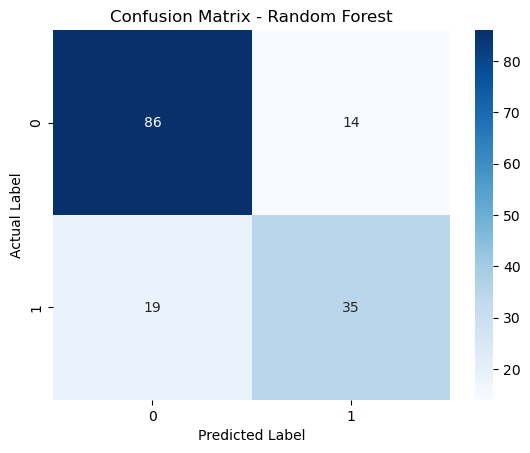

In [30]:
# Visualize Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [46]:
# Predict whether a patient has diabetes or not
def predict_diabetes(input_data):
    # Convert input data to DataFrame with proper column names
    input_data_df = pd.DataFrame([input_data], columns=X.columns)  # Use X.columns for valid feature names
    input_data_scaled = scaler.transform(input_data_df)  # Scale the input data
    input_data_rfe = rfe_selector.transform(input_data_scaled)  # Apply RFE
    prediction = rf_model.predict(input_data_rfe)
    
    if prediction[0] == 1:
        return "The patient has diabetes."
    else:
        return "The patient does not have diabetes."


In [48]:
# Example: Predict based on a patient's data
# Sample patient data (randomly taken from X_test)
sample_patient_data = X_test.iloc[0].values
prediction_result = predict_diabetes(sample_patient_data)
print("\nPrediction Result for Sample Patient:")
print(prediction_result)


Prediction Result for Sample Patient:
The patient has diabetes.
